In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.metrics import roc_curve, auc
from funcs_plotter import double_roc, single_roc, getEfficiency, \
                            getPurity, plotChart, plot_confusion_matrix, \
                            plot_roc_curve_custom, plot_roc_compare


# Plot ROC curves superimposed

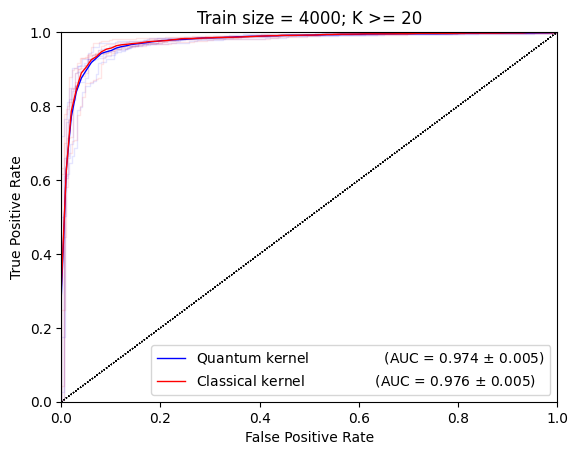

In [2]:
#totalSizes = [100, 500, 1000, 5000, 10000, 50000]
totalSizes = [5000]
#k_values = [5, 10, 20]
k_values = [20]
for totalSize in totalSizes:
    for k_value in k_values:
        path_quant = 'output/result_Quant-alpha0p05-C500-dataMapFuncNone-interactionZandYZ-weightBalanced-trainSize'+str(int(4*totalSize/5))+'-testSize'+str(int(totalSize/5))+'-foldIdx{}-minOfK'+str(k_value)+'.pkl'
        path_class = 'output/result_Class-C100-gammaauto-weightBalanced-trainSize'+str(int(4*totalSize/5))+'-testSize'+str(int(totalSize/5))+'-foldIdx{}-minOfK'+str(k_value)+'.pkl'
        plot_roc_compare(path_quant, path_class)

# Single and two roc curves + conf mtx

In [9]:
totalSizes = [5000]
k_values = [20]
foldIdx = 0
for totalSize in totalSizes:
    for k_value in k_values:
        path_quant = 'output/result_Quant-alpha0p05-C500-dataMapFuncNone-interactionZandYZ-weightBalanced-trainSize'+str(int(4*totalSize/5))+'-testSize'+str(int(totalSize/5))+'-foldIdx{}-minOfK'+str(k_value)+'.pkl'
        path_class = 'output/result_Class-C100-gammaauto-weightBalanced-trainSize'+str(int(4*totalSize/5))+'-testSize'+str(int(totalSize/5))+'-foldIdx{}-minOfK'+str(k_value)+'.pkl'        
        df_qm = pd.read_pickle(path_quant.format(foldIdx))
        df_cl = pd.read_pickle(path_class.format(foldIdx))


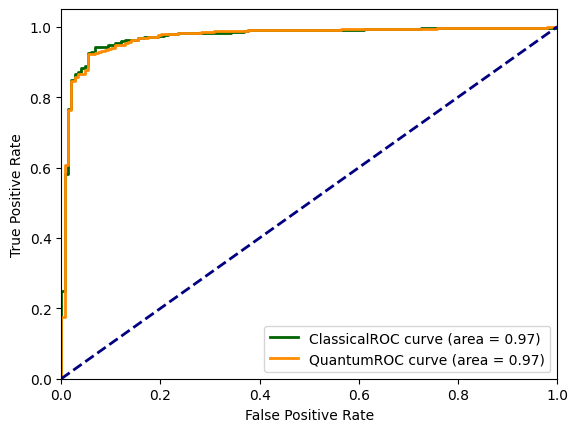

In [10]:
double_roc(df_cl, 'Classical', df_qm, 'Quantum')

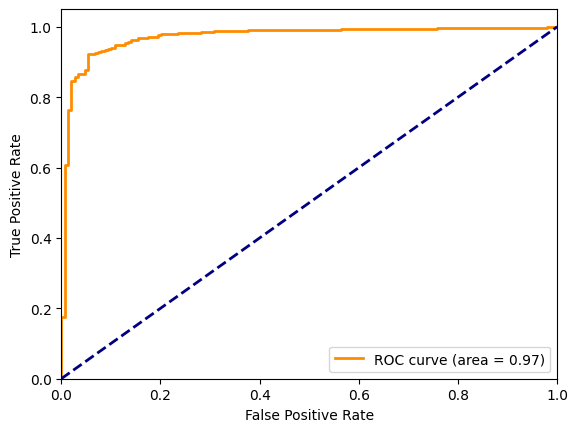

In [11]:
single_roc(df_qm,'')

In [ ]:
#eff_class = {}
#purity_class = {}
#eff_quant = {}
#purity_quant = {}
#trainSizes = [50, 100, 500, 1000, 5000, 10000, 50000]
#for trainSize in trainSizes:
#    df_class = getDataset(outputPath='output/', classical=True, trainSize=trainSize)
#    df_quant = getDataset(outputPath='output/', classical=False, trainSize=trainSize)
#    eff_class[trainSize] = getEfficiency(df_class)
#    eff_quant[trainSize] = getEfficiency(df_quant)
#    purity_class[trainSize] = getPurity(df_class)
#    purity_quant[trainSize] = getPurity(df_quant)
    

In [ ]:
#plotChart(dictClass=eff_class, dictQuant=eff_quant, yLabel='efficiency')

In [ ]:
#plotChart(dictClass=purity_class, dictQuant=purity_quant, yLabel='purity')

[[0.94630872 0.05369128]
 [0.08695652 0.91304348]]


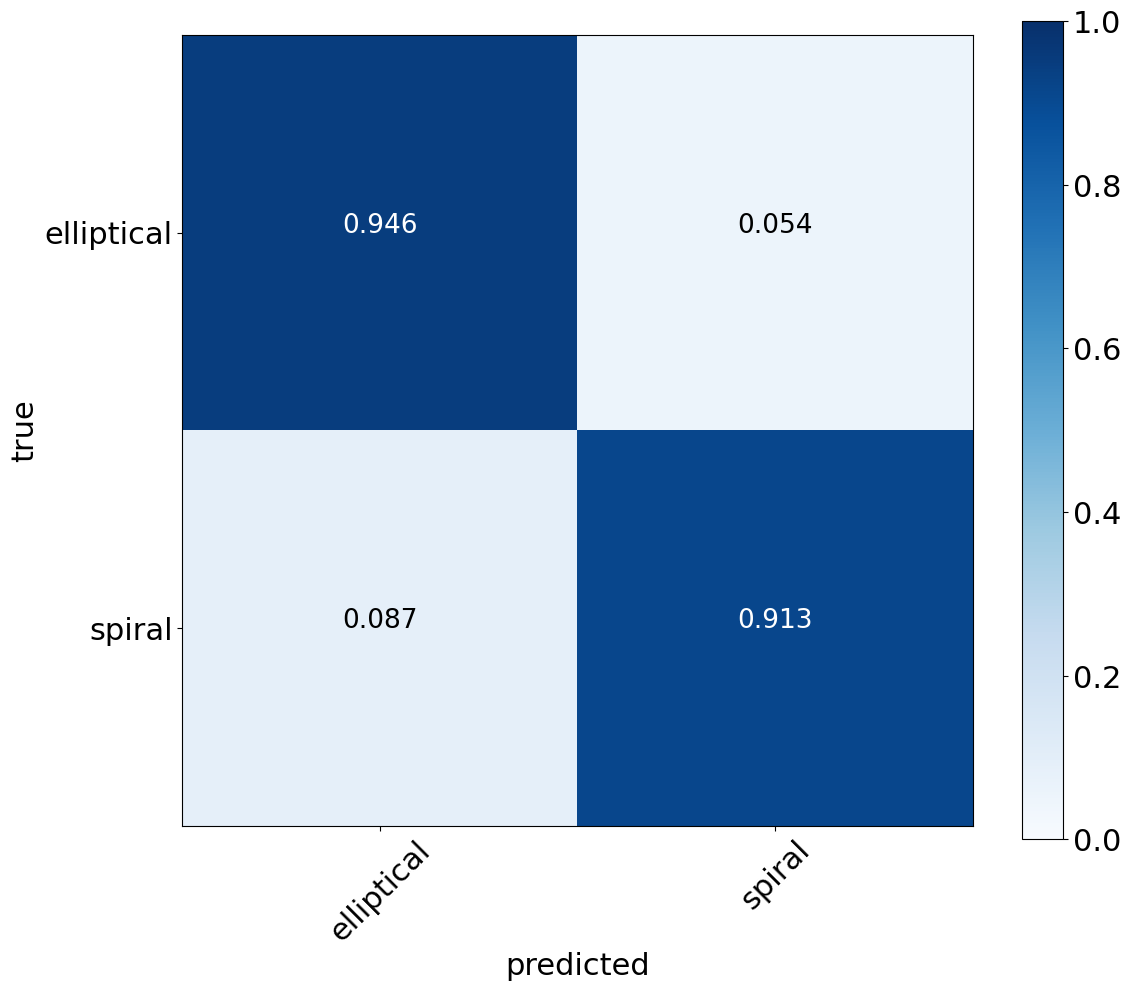

In [12]:
plot_confusion_matrix(df_qm['trueLabels'], df_qm['predictedLabels'], normalize_by_yTrue=True)


[[0.94630872 0.05369128]
 [0.08343126 0.91656874]]


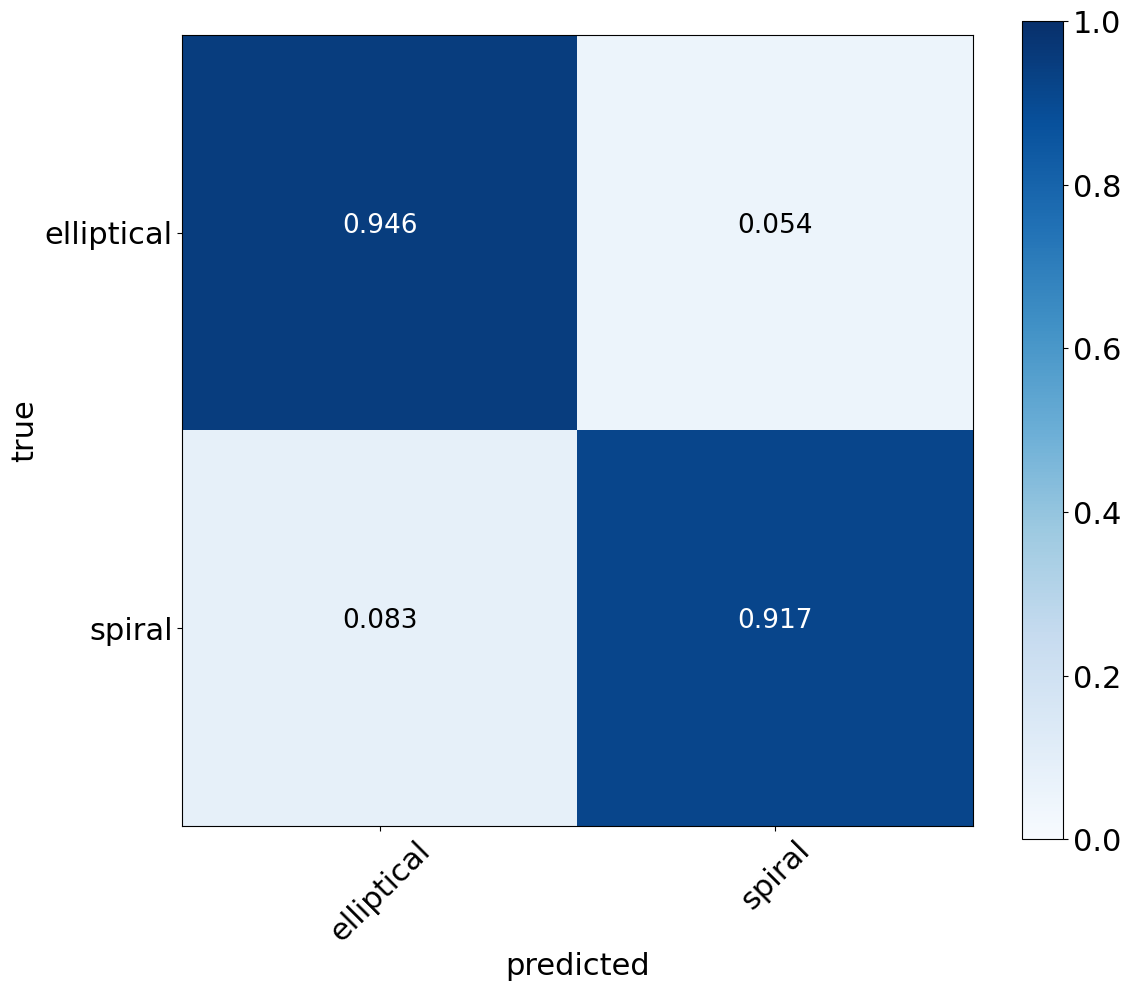

In [13]:
plot_confusion_matrix(df_cl['trueLabels'], df_cl['predictedLabels'], normalize_by_yTrue=True)


[[0.65581395 0.01019108]
 [0.34418605 0.98980892]]


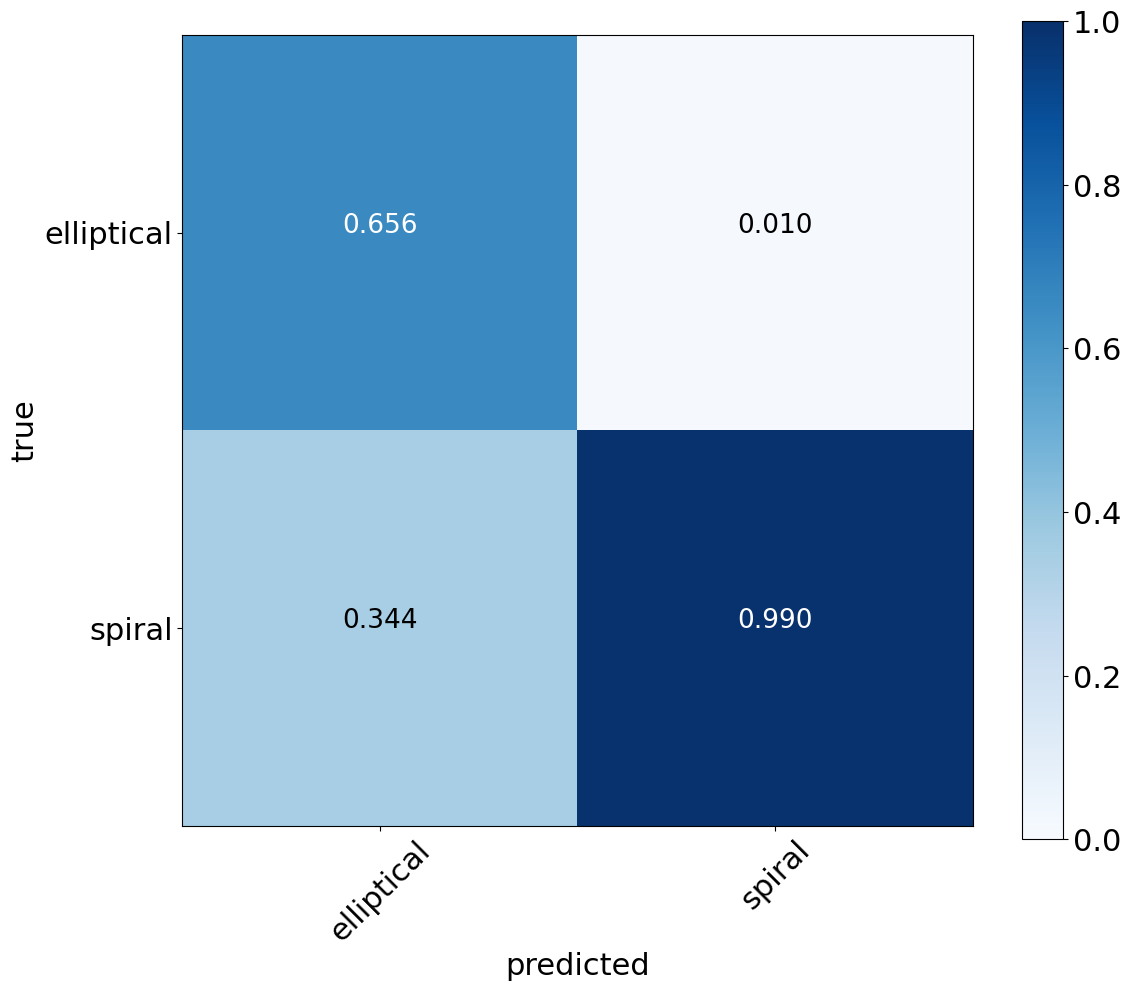

In [14]:
plot_confusion_matrix(df_qm['trueLabels'], df_qm['predictedLabels'], normalize_by_yPredicted=True)


[[0.66509434 0.01015228]
 [0.33490566 0.98984772]]


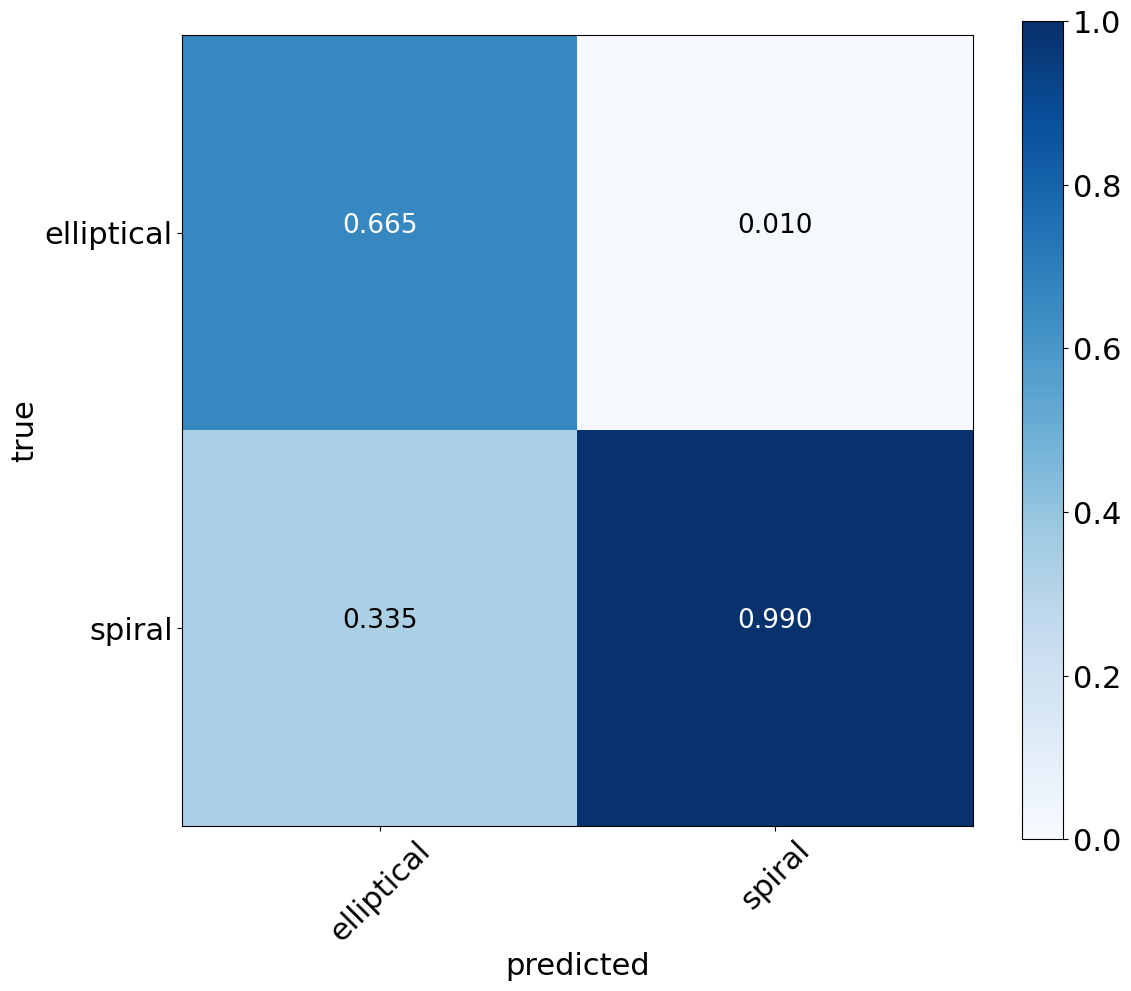

In [15]:
plot_confusion_matrix(df_cl['trueLabels'], df_cl['predictedLabels'], normalize_by_yPredicted=True)
